In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
df = pd.read_csv("/Users/Lenovo/Desktop/mac/csv files for sem 2/CardioGoodFitness.csv")
display(type(df))
df.head(5)

pandas.core.frame.DataFrame

,Product,Age,Gender,MaritalStatus,FitnessScore,Income,Miles
0,TM195,18,Male,Single,4,29562,112
1,TM195,19,Male,Single,3,31836,75
2,TM195,19,Female,Partnered,3,30699,66
3,TM195,19,Male,Single,3,32973,85
4,TM195,20,Male,Partnered,2,35247,47


In [19]:
#df.shape
# df shape is used 
# Get unique column names
unique_columns = df.columns.unique()
# to tell the unqiue values of the dataset

print(unique_columns)


Index(['Product', 'Age', 'Gender', 'MaritalStatus', 'FitnessScore', 'Income',
       'Miles'],
      dtype='object')


In [4]:
# to check if there are some null or empty values in the dataset.csv

df.isnull().sum()
df.dropna(inplace=True)
print(df.isnull().sum())

Product          0
Age              0
Gender           0
MaritalStatus    0
FitnessScore     0
Income           0
Miles            0
dtype: int64


In [5]:
# now making the cleaned data into a new dataset so that is can be used for preproccssing.
from IPython.display import FileLink
# this library is used to import a new file from the cleaned dataset
cleaned_file_path = 'cardio_cleaned_dataset.csv'
df.to_csv(cleaned_file_path , index=False)
FileLink(cleaned_file_path)


/Users/Lenovo/Desktop/4 sem/calculating-fitness-using-the-cardio-levels-python-project-/cardio_cleaned_dataset.csv

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

df .shape is used to tell the shape or the length of the given file .

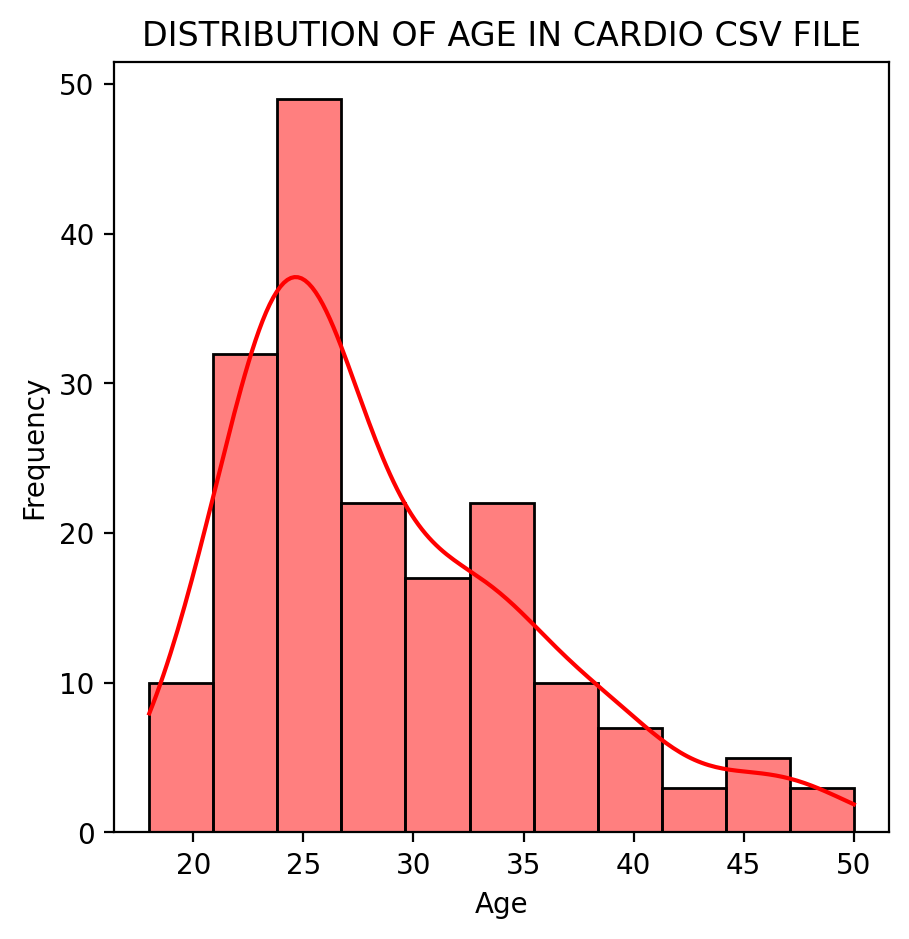

In [ ]:
plt.figure(figsize=(5,5), dpi = 200)
sns.histplot(df['Age'],bins = 11 , kde = True, color = 'red')
plt.title('DISTRIBUTION OF AGE IN CARDIO CSV FILE')
p=10
plt.xlabel('Age' ,fontsize= p)
plt.ylabel('Frequency' , fontsize= p)

plt.show()



after this we will do the gender count in  pie chart

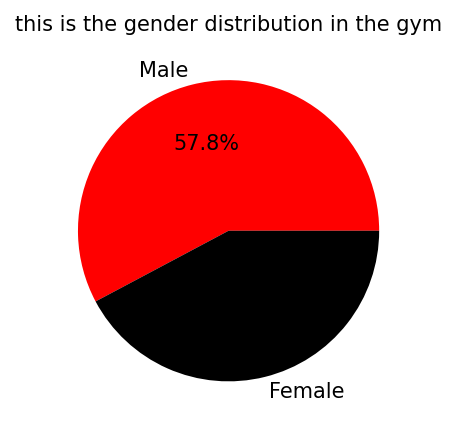

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize = (4,3), dpi = 150)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['red', 'black'])
plt.title('this is the gender distribution in the gym' , fontsize =10)
plt.tight_layout()


plt.show()


from here we will move on to the martial status of the people in the gym

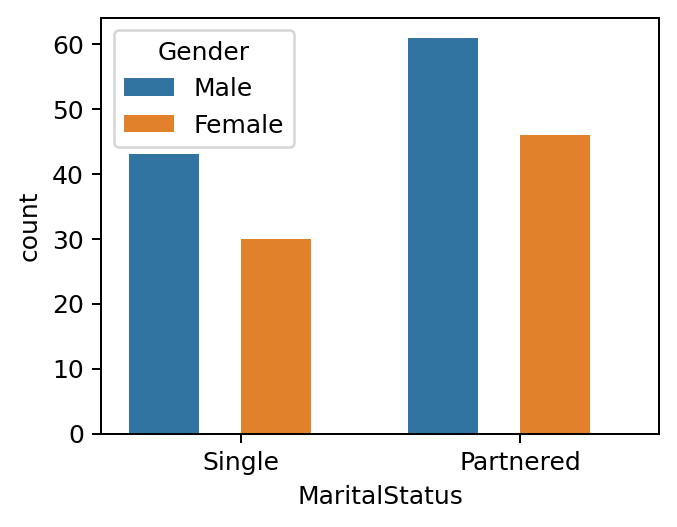

NameError: name 'bar_color' is not defined

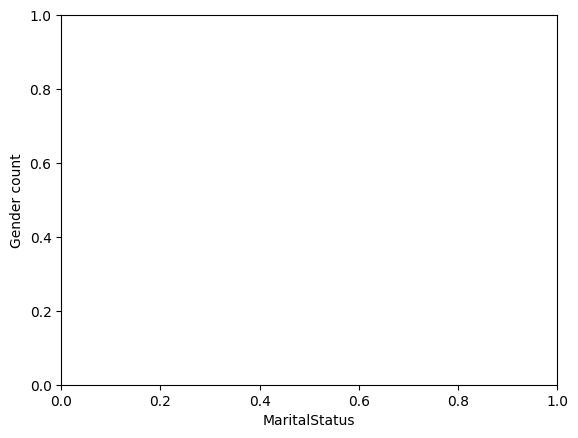

In [ ]:
plt.figure(figsize=(4, 3),dpi=180)
sns.countplot(x="MaritalStatus", hue = "Gender", data = df)
bar_width = 0.25  # adjusting the bar width
for bar in plt.gca().patches:
    bar.set_width(bar_width)
# Show the plot
plt.show()
plt.xlabel('MaritalStatus', fontsize = 10)
plt.ylabel('Gender count' , fontsize=10)
# Change the color of bars
bar_color('red','black')
# Change ylabel to Gender count


after this we will be plotting about the age of the people in th gym

In [ ]:
age_counts = df['Age'].value_counts().sort_index()
display(age_counts.head(8))
# this is used to display all the age counts which are there and the amount of time each age count appeared



In [ ]:
sub_df = df[['Age','Gender']]
sub_df.head(10)

In [ ]:
# Relationship between categorical and continuous variable
plt.figure(figsize=(4, 3),dpi=150)
sns.boxplot( x ="Gender" , y="Age" , data = df , hue = "Gender", width = .6)
#we can also change the background of the gird
# Reduce the width of boxes

# change the color of boxes
my_colors = ["#2ecc71", "#006a4e" ]
sns.set_palette(my_colors)




#age vs fitness will be done from here on... We are going to display ther max fitness of the each age.

In [ ]:
# to find the maximum value of each age group
max_miles_each_age =df.groupby('Age')['Miles'].max().reset_index() 
max_miles_each_age
# this will tell eac



In [ ]:
sns.lineplot(x='Age' , y='Miles', data= max_miles_each_age,marker='o')
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.xticks(rotation=75, ha='right')
plt.show

In [ ]:
plt.figure(figsize= (4, 3), dpi = 120)
sns.set(style="darkgrid")
sns.boxplot(x="Age", y = "FitnessScore", data = df ,orient='h')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
sns.set_style('white')
plt.show()



now in this csv file we will examine the gender vs fitness in this

In [ ]:
df = df[['Gender','FitnessScore']]
df.head()

In [ ]:
sns.countplot(x='Gender', hue='FitnessScore', data=df, edgecolor = "black" )
plt.title('Gender vs Fitness')
plt.show()
#if we want to setup a specific color in the bar we can just use color =

Now we are going to do some model creation on this dataset where we are going to tell what is the fitness level of a person by taking age as well as miles ran by that person on that age.

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# imported the necessary librariries.


In [55]:
# for making a training model we have to define both the criteria so that which have to be tested and which have to be read so that 
#here we can name them by T1,T2
A = df[['Age' , 'Miles']]# this is our features which we have to read so that the model can be trained.
B = df['FitnessScore']



In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A ,B, test_size=0.2, random_state=42)
# here the model has been created and now we have to make the
model = LinearRegression()
# creating the linearRegression model 
# now we will train that model
model.fit(A_train, B_train)
predictions = model.predict(A_test)



In [ ]:
# we have created a model now we are going to test that model if it works or not.
given_age = 18
given_miles= 200
predicted_ftinessscore = model.predict([[given_age , given_miles]])
print("Predicted ftiness score for a person of age {} years and miles {} mile: {:.2f}".format(given_age, given_miles, predicted_ftinessscore[0]))
# here the we have prepared the model whci


In [ ]:
df.head(5)
df = df.drop_duplicates()
df.head(5)
